In [56]:
%reload_ext autoreload
%autoreload 2
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import pickle


#from SCRIPT.eval_tools import *

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
pip install scripts

Note: you may need to restart the kernel to use updated packages.


In [58]:
with open('pickles/timeseries_sac_p.pkl', 'rb') as fp:
    sac_p = pickle.load(fp)
    
    sac_p.index = pd.DatetimeIndex(sac_p.index.values, freq='infer')
    sac_p.columns = sac_p.columns.astype(str)

In [59]:
select_zipcode = ['95630', '95608', '95818', '95632', '95824']

In [61]:
zip_1 = select_zipcode[0]
sel_df1 = sac_p[zip_1]
zip_2 = select_zipcode[1]
sel_df2 = sac_p[zip_2]
zip_3 = select_zipcode[2]
sel_df3 = sac_p[zip_3]
zip_4 = select_zipcode[3]
sel_df4 = sac_p[zip_4]
zip_5 = select_zipcode[4]
sel_df5 = sac_p[zip_5]


In [62]:
pdq = (1, 1, 1)
SPDQ = (0, 0, 1, 12)

In [63]:
sarima = SARIMAX(sel_df1, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model1 = sarima.fit()

In [64]:
pred1 = sarima_model1.forecast(steps = 3*12)

In [ ]:
#### zipCode2

In [65]:
pdq = (1, 1, 1)
SPDQ = (1, 0, 1, 12)

In [67]:
sarima = SARIMAX(sel_df2, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model2 = sarima.fit()

In [68]:
pred2 = sarima_model2.forecast(steps = 3*12)

In [69]:
pdq = (1, 0, 1)
SPDQ = (1, 0, 1, 12)

In [70]:
sarima = SARIMAX(sel_df3, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model3 = sarima.fit()

In [71]:
pred3 = sarima_model3.forecast(steps = 3*12)

In [72]:
pdq = (1, 0, 0)
SPDQ = (1, 0, 1, 12)

In [73]:
sarima = SARIMAX(sel_df4, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model4 = sarima.fit()

In [74]:
pred4 = sarima_model4.forecast(steps = 3*12)

In [75]:
pdq = (0, 1, 1)
SPDQ = (1, 0, 1, 12)

In [76]:
sarima = SARIMAX(sel_df5, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model5 = sarima.fit()

In [77]:
pred5 = sarima_model5.forecast(steps = 3*12)

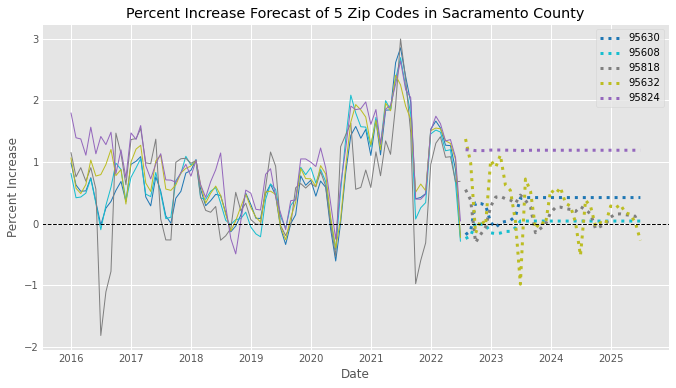

In [96]:
fig = plt.figure(figsize = (10, 6))
plt.plot(sel_df1.loc['2016-01-01':], lw = 1, color = 'tab:blue')
plt.plot(sel_df2.loc['2016-01-01':], lw = 1, color = 'tab:cyan')
plt.plot(sel_df3.loc['2016-01-01':], lw = 1, color = 'tab:gray')
plt.plot(sel_df4.loc['2016-01-01':], lw = 1, color = 'tab:olive')
plt.plot(sel_df5.loc['2016-01-01':], lw = 1, color = 'tab:purple')

plt.plot(pred1, ls = 'dotted', lw = 3, color = 'tab:blue', label = select_zipcode[0])
plt.plot(pred2, ls = 'dotted', lw = 3, color = 'tab:cyan', label = select_zipcode[1])
plt.plot(pred3, ls = 'dotted', lw = 3, color = 'tab:gray', label = select_zipcode[2])
plt.plot(pred4, ls = 'dotted', lw = 3, color = 'tab:olive', label = select_zipcode[3])
plt.plot(pred5, ls = 'dotted', lw = 3, color = 'tab:purple', label = select_zipcode[4])

#plt.axvline(x='2020-09-01', lw = 1, color = 'black', ls = '--')

plt.axhline(y=0, lw = 1, color = 'black', ls = '--')
plt.xlabel('Date')
plt.ylabel('Percent Increase')
plt.title('Percent Increase Forecast of 5 Zip Codes in Sacramento County')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

#### importData with  🥒 

In [88]:
with open('pickles/timeseries_sac.pkl', 'rb') as fp:
    sac = pickle.load(fp)
    
sac.index = pd.DatetimeIndex(sac.index.values, freq='infer')
sac.columns = sac.columns.astype(str)

In [89]:
def compute_housing_price(zip_, pred):
    last_val = sac[zip_][-1]
    prices = []
    for rate in pred:
        current = last_val * (1 + rate/100)
        prices.append(current)
        last_val = current
    return prices

In [90]:
price1 = compute_housing_price(select_zipcode[0], pred1)
price2 = compute_housing_price(select_zipcode[1], pred2)
price3 = compute_housing_price(select_zipcode[2], pred3)
price4 = compute_housing_price(select_zipcode[3], pred4)
price5 = compute_housing_price(select_zipcode[4], pred5)

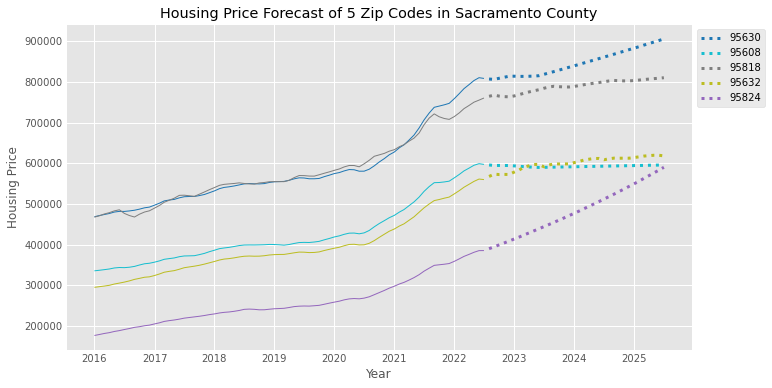

In [97]:
fig = plt.figure(figsize = (10, 6))
plt.plot(sac[select_zipcode[0]].loc['2016-01-01':], lw = 1, color = 'tab:blue')
plt.plot(sac[select_zipcode[1]].loc['2016-01-01':], lw = 1, color = 'tab:cyan')
plt.plot(sac[select_zipcode[2]].loc['2016-01-01':], lw = 1, color = 'tab:gray')
plt.plot(sac[select_zipcode[3]].loc['2016-01-01':], lw = 1, color = 'tab:olive')
plt.plot(sac[select_zipcode[4]].loc['2016-01-01':], lw = 1, color = 'tab:purple')


plt.plot(pred1.index, price1, ls = 'dotted', lw = 3, color = 'tab:blue', label = select_zipcode[0])
plt.plot(pred2.index, price2, ls = 'dotted', lw = 3, color = 'tab:cyan', label = select_zipcode[1])
plt.plot(pred3.index, price3, ls = 'dotted', lw = 3, color = 'tab:gray', label = select_zipcode[2])
plt.plot(pred4.index, price4, ls = 'dotted', lw = 3, color = 'tab:olive', label = select_zipcode[3])
plt.plot(pred5.index, price5, ls = 'dotted', lw = 3, color = 'tab:purple', label = select_zipcode[4])

#plt.axvline(x='2020-09-01', lw = 1, color = 'black', ls = '--')

plt.xlabel('Year')
plt.ylabel('Housing Price')
plt.title('Housing Price Forecast of 5 Zip Codes in Sacramento County')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

### 95630 (dark blue above) Folsom 
### 95818 (dark gray) Land Park (Sacramento)
### 95608 (light blue) Carmichael  
### 95632 (olive) Galt 
### 95824 (purple) Lemon Hill/FruitRidge Manor (up and coming!)